# Trader Performance vs Market Sentiment Analysis

## Objective
Analyze how market sentiment (Fear/Greed) relates to trader behavior and performance on Hyperliquid.

---




# Part A – Data Preparation

In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [2]:
# Load Fear/Greed dataset
fear_greed = pd.read_csv("../data/fear_greed_index.csv")

# Load Trader dataset
trader_data = pd.read_csv("../data/historical_trader_data.csv")

print("Fear/Greed Shape:", fear_greed.shape)
print("Trader Data Shape:", trader_data.shape)


Fear/Greed Shape: (2644, 4)
Trader Data Shape: (211224, 16)


In [3]:
print("Fear/Greed Info:")
display(fear_greed.info())
display(fear_greed.head())

print("\nTrader Data Info:")
display(trader_data.info())
display(trader_data.head())


Fear/Greed Info:
<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   timestamp       2644 non-null   int64
 1   value           2644 non-null   int64
 2   classification  2644 non-null   str  
 3   date            2644 non-null   str  
dtypes: int64(2), str(2)
memory usage: 82.8 KB


None

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  str    
 1   Coin              211224 non-null  str    
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  str    
 6   Timestamp IST     211224 non-null  str    
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  str    
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  str    
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), 

None

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
print("Missing values - Fear/Greed")
display(fear_greed.isnull().sum())

print("\nMissing values - Trader Data")
display(trader_data.isnull().sum())


Missing values - Fear/Greed


timestamp         0
value             0
classification    0
date              0
dtype: int64


Missing values - Trader Data


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [5]:
print("Duplicate rows in Fear/Greed:", fear_greed.duplicated().sum())
print("Duplicate rows in Trader Data:", trader_data.duplicated().sum())


Duplicate rows in Fear/Greed: 0
Duplicate rows in Trader Data: 0


In [6]:
# Convert Timestamp IST to datetime
trader_data["Timestamp IST"] = pd.to_datetime(
    trader_data["Timestamp IST"],
    format="%d-%m-%Y %H:%M"
)

# Create date column
trader_data["date"] = trader_data["Timestamp IST"].dt.date

trader_data.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [7]:
fear_greed["date"] = pd.to_datetime(fear_greed["date"]).dt.date

fear_greed.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
print("Fear/Greed Date Range:")
print("Min:", fear_greed["date"].min())
print("Max:", fear_greed["date"].max())

print("\nTrader Data Date Range:")
print("Min:", trader_data["date"].min())
print("Max:", trader_data["date"].max())


Fear/Greed Date Range:
Min: 2018-02-01
Max: 2025-05-02

Trader Data Date Range:
Min: 2023-05-01
Max: 2025-05-01


In [9]:
# Merge trader data with sentiment data on date
merged_data = trader_data.merge(
    fear_greed[["date", "classification", "value"]],
    on="date",
    how="left"
)

print("Merged Shape:", merged_data.shape)
merged_data.head()


Merged Shape: (211224, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0


In [10]:
print("Missing sentiment after merge:")
print(merged_data["classification"].isnull().sum())


Missing sentiment after merge:
6


In [11]:
# Inspect missing sentiment rows
merged_data[merged_data["classification"].isnull()][["date"]].drop_duplicates()


,date
727,2024-10-26


In [12]:
# Drop rows without sentiment
merged_data = merged_data.dropna(subset=["classification"])

print("Shape after dropping missing sentiment:", merged_data.shape)


Shape after dropping missing sentiment: (211218, 19)


---

## Feature Engineering – Daily Trader Metrics

We now construct daily-level behavioral and performance metrics per trader:

- Daily total PnL
- Daily win rate
- Daily trade count
- Average trade size (USD)
- Long/Short ratio (market level)
- Sentiment classification per day

These features will be used for behavioral analysis in Part B.


In [21]:
# Create Daily PnL per Trader
daily_pnl = (
    merged_data
    .groupby(["Account", "date"])["Closed PnL"]
    .sum()
    .reset_index(name="daily_pnl")
)

daily_pnl.head()


,Account,date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [23]:
# Create Win Indicator
merged_data["is_win"] = np.where(merged_data["Closed PnL"] > 0, 1, 0)

merged_data.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0,0


In [24]:
# Daily Win Rate per Trader
daily_win_rate = (
    merged_data
    .groupby(["Account", "date"])["is_win"]
    .mean()
    .reset_index(name="daily_win_rate")
)


daily_win_rate.head()


,Account,date,daily_win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,0.444444


In [25]:
# Daily Trade Count
daily_trade_count = (
    merged_data
    .groupby(["Account", "date"])
    .size()
    .reset_index(name="daily_trade_count")
)


daily_trade_count.head()


,Account,date,daily_trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [26]:
# Daily Average Trade Size (USD)
daily_avg_size = (
    merged_data
    .groupby(["Account", "date"])["Size USD"]
    .mean()
    .reset_index(name="avg_trade_size_usd")
)


daily_avg_size.head()


,Account,date,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,5089.718249
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,7976.664412
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,23734.500000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,28186.666667
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,17248.148148


In [28]:

# Long / Short Ratio (Market Level Per Day)

merged_data["Side"] = merged_data["Side"].str.upper()

long_short_daily = (
    merged_data
    .groupby(["date", "Side"])
    .size()
    .unstack(fill_value=0)
)

# Ensure both BUY and SELL columns exist
if "BUY" not in long_short_daily.columns:
    long_short_daily["BUY"] = 0

if "SELL" not in long_short_daily.columns:
    long_short_daily["SELL"] = 0

# Add small epsilon to avoid divide by zero
epsilon = 1e-6

long_short_daily["long_short_ratio"] = (
    long_short_daily["BUY"] /
    (long_short_daily["SELL"] + epsilon)
)

long_short_daily.head()


Side,BUY,SELL,long_short_ratio
date,,,
2023-05-01,3,0,3.000000e+06
2023-12-05,7,2,3.499998e+00
2023-12-14,5,6,8.333332e-01
2023-12-15,2,0,2.000000e+06
2023-12-16,3,0,3.000000e+06


---

## Consolidating Daily Trader Metrics

We now combine all daily trader-level metrics into a single structured dataset for analysis.


In [29]:
# Merge All Daily Metrics Together
from functools import reduce

dfs = [
    daily_pnl,
    daily_win_rate,
    daily_trade_count,
    daily_avg_size
]

daily_metrics = reduce(
    lambda left, right: pd.merge(left, right, on=["Account", "date"]),
    dfs
)

daily_metrics.head()


,Account,date,daily_pnl,daily_win_rate,daily_trade_count,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,177,5089.718249
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,68,7976.664412
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,40,23734.500000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,0.000000,12,28186.666667
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,0.444444,27,17248.148148


---

## Adding Market Sentiment to Trader Daily Metrics


In [30]:
# Extract unique daily sentiment
daily_sentiment = (
    merged_data[["date", "classification", "value"]]
    .drop_duplicates()
)

# Merge sentiment
daily_metrics = daily_metrics.merge(
    daily_sentiment,
    on="date",
    how="left"
)

daily_metrics.head()


,Account,date,daily_pnl,daily_win_rate,daily_trade_count,avg_trade_size_usd,classification,value
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,177,5089.718249,Extreme Greed,76.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,68,7976.664412,Extreme Greed,90.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,40,23734.500000,Extreme Greed,83.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,0.000000,12,28186.666667,Extreme Greed,94.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,0.444444,27,17248.148148,Extreme Greed,79.0


---

## Adding Market Long/Short Ratio


In [31]:
# Reset index so date becomes column
long_short_daily_reset = long_short_daily.reset_index()

# Merge with daily metrics
daily_metrics = daily_metrics.merge(
    long_short_daily_reset[["date", "long_short_ratio"]],
    on="date",
    how="left"
)

daily_metrics.head()


,Account,date,daily_pnl,daily_win_rate,daily_trade_count,avg_trade_size_usd,classification,value,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,177,5089.718249,Extreme Greed,76.0,0.336918
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,68,7976.664412,Extreme Greed,90.0,0.536765
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,40,23734.500000,Extreme Greed,83.0,0.565611
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,0.000000,12,28186.666667,Extreme Greed,94.0,0.928977
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,0.444444,27,17248.148148,Extreme Greed,79.0,1.876190


In [32]:
print("Final Daily Metrics Shape:", daily_metrics.shape)
print("Unique Traders:", daily_metrics["Account"].nunique())
daily_metrics.describe()


Final Daily Metrics Shape: (2340, 9)
Unique Traders: 32


,daily_pnl,daily_win_rate,daily_trade_count,avg_trade_size_usd,value,long_short_ratio
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2.340000e+03
mean,4382.259380,0.359653,90.264103,6986.186847,54.852137,3.307708e+05
std,28411.103383,0.343419,214.650554,21542.693224,20.619321,3.448887e+06
min,-358963.139984,0.000000,1.000000,0.000000,10.000000,0.000000e+00
25%,0.000000,0.000000,9.000000,692.696303,34.000000,5.623100e-01
50%,206.352695,0.318182,29.000000,1913.761949,55.000000,9.279661e-01
75%,1842.763729,0.607357,80.000000,7033.497292,74.000000,1.421245e+00
max,533974.662903,1.000000,4083.000000,844654.190000,94.000000,7.400000e+07


---

# Part A Summary – Data Preparation Summary

In this section, we:

1. Loaded and validated both datasets.
2. Checked for missing values and duplicates.
3. Converted timestamps and aligned both datasets at daily level.
4. Merged trader data with market sentiment (Fear/Greed).
5. Engineered daily trader-level metrics:
   - Daily total PnL
   - Daily win rate
   - Daily trade count
   - Average trade size (USD)
   - Market long/short ratio
6. Constructed a structured dataset at the trader × day level (2340 rows, 32 traders).

This dataset is now ready for behavioral and performance analysis across sentiment regimes.


---

# Part B – Sentiment-Based Performance & Behavioral Analysis


In [33]:
def simplify_sentiment(x):
    if "Fear" in x:
        return "Fear"
    elif "Greed" in x:
        return "Greed"
    else:
        return "Neutral"

daily_metrics["sentiment_group"] = daily_metrics["classification"].apply(simplify_sentiment)

daily_metrics["sentiment_group"].value_counts()


sentiment_group
Greed      1174
Fear        790
Neutral     376
Name: count, dtype: int64

## B1: Performance Comparison: Fear vs Greed


In [34]:
performance_by_sentiment = (
    daily_metrics
    .groupby("sentiment_group")[["daily_pnl", "daily_win_rate"]]
    .mean()
)

performance_by_sentiment


,daily_pnl,daily_win_rate
sentiment_group,,
Fear,5185.146443,0.357071
Greed,4144.208334,0.362748
Neutral,3438.618818,0.355414


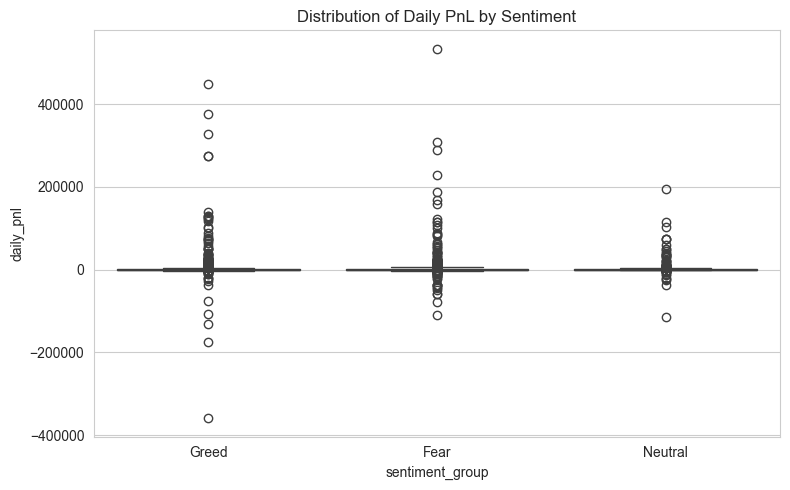

In [60]:
# Visualizing PnL Differences
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_metrics, x="sentiment_group", y="daily_pnl")
plt.title("Distribution of Daily PnL by Sentiment")
plt.tight_layout()
plt.savefig("outputs/pnl_by_sentiment.png", dpi=300)
plt.show()



## B2: Behavioral Changes Across Sentiment Regimes


In [36]:
behavior_by_sentiment = (
    daily_metrics
    .groupby("sentiment_group")[["daily_trade_count", "avg_trade_size_usd"]]
    .mean()
)

behavior_by_sentiment


,daily_trade_count,avg_trade_size_usd
sentiment_group,,
Fear,105.363291,8529.859802
Greed,76.912266,5954.632633
Neutral,100.228723,6963.694861


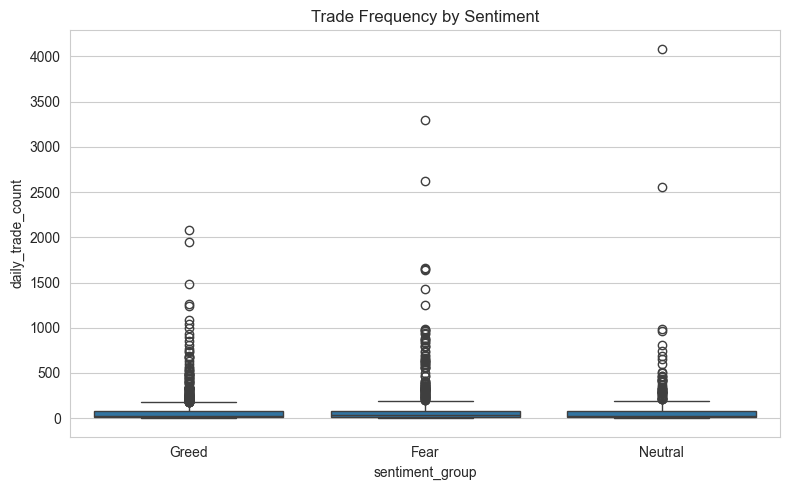

In [61]:
# Visualize Trade Count
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_metrics, x="sentiment_group", y="daily_trade_count")
plt.title("Trade Frequency by Sentiment")
plt.tight_layout()
plt.savefig("outputs/trade_frequency_plot.png", dpi=300)
plt.show()



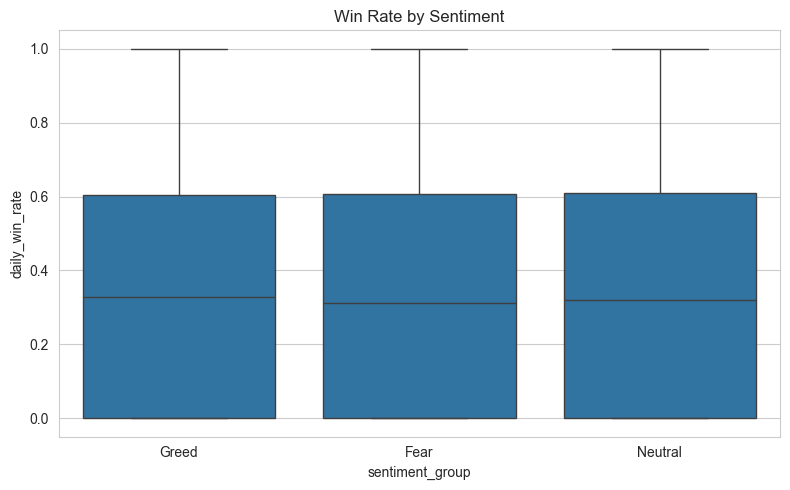

In [62]:
# Visualize Win Rate
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_metrics, x="sentiment_group", y="daily_win_rate")
plt.title("Win Rate by Sentiment")
plt.tight_layout()
plt.savefig("outputs/win_rate_by_sentiment.png", dpi=300)
plt.show()



## B3: Segment Analysis

In [39]:
# Create Trader Segments
# Segment 1: High vs Low Frequency Traders
trader_avg_trades = (
    daily_metrics
    .groupby("Account")["daily_trade_count"]
    .mean()
)

threshold = trader_avg_trades.median()

high_freq_traders = trader_avg_trades[trader_avg_trades > threshold].index
low_freq_traders = trader_avg_trades[trader_avg_trades <= threshold].index

daily_metrics["freq_segment"] = np.where(
    daily_metrics["Account"].isin(high_freq_traders),
    "High Frequency",
    "Low Frequency"
)

daily_metrics["freq_segment"].value_counts()


freq_segment
Low Frequency     1306
High Frequency    1034
Name: count, dtype: int64

In [40]:
# Compare Segment Performance
segment_performance = (
    daily_metrics
    .groupby(["freq_segment", "sentiment_group"])["daily_pnl"]
    .mean()
    .unstack()
)

segment_performance


sentiment_group,Fear,Greed,Neutral
freq_segment,,,
High Frequency,7955.443672,4942.350620,4130.277361
Low Frequency,2524.836201,3590.230787,2891.879207


In [41]:
# Segment 2: Consistent vs Inconsistent Traders (based on win rate volatility)

trader_win_std = (
    daily_metrics
    .groupby("Account")["daily_win_rate"]
    .std()
)

consistency_threshold = trader_win_std.median()

consistent_traders = trader_win_std[trader_win_std < consistency_threshold].index
inconsistent_traders = trader_win_std[trader_win_std >= consistency_threshold].index

daily_metrics["consistency_segment"] = np.where(
    daily_metrics["Account"].isin(consistent_traders),
    "Consistent",
    "Inconsistent"
)

daily_metrics["consistency_segment"].value_counts()


consistency_segment
Consistent      1664
Inconsistent     676
Name: count, dtype: int64

In [42]:
consistency_performance = (
    daily_metrics
    .groupby(["consistency_segment", "sentiment_group"])["daily_pnl"]
    .mean()
    .unstack()
)

consistency_performance


sentiment_group,Fear,Greed,Neutral
consistency_segment,,,
Consistent,3955.047816,4362.140479,3708.421470
Inconsistent,7227.027330,3458.068611,2651.694415


## B4 – Risk, Volatility & Regime Dispersion Analysis



To understand whether performance differences are structural or simply driven by volatility, we analyze:

- PnL volatility (standard deviation)
- Loss frequency
- Risk-adjusted performance (PnL / Volatility proxy)

This helps determine whether Fear regimes truly offer better risk-adjusted returns or simply higher variance.

In [45]:
# PnL Volatility by Sentiment Regime

volatility_by_sentiment = (
    daily_metrics
    .groupby("sentiment_group")["daily_pnl"]
    .std()
    .rename("pnl_volatility")
)

volatility_by_sentiment


sentiment_group
Fear       31224.148764
Greed      29252.037677
Neutral    17447.863645
Name: pnl_volatility, dtype: float64

In [46]:
# Loss Frequency by Sentiment Regime

loss_rate_by_sentiment = (
    daily_metrics
    .assign(is_loss = daily_metrics["daily_pnl"] < 0)
    .groupby("sentiment_group")["is_loss"]
    .mean()
    .rename("loss_rate")
)

loss_rate_by_sentiment


sentiment_group
Fear       0.120253
Greed      0.075809
Neutral    0.111702
Name: loss_rate, dtype: float64

In [47]:
# Risk-Adjusted Performance Proxy (Mean / Std)

risk_adjusted = (
    daily_metrics
    .groupby("sentiment_group")["daily_pnl"]
    .agg(["mean", "std"])
)

risk_adjusted["risk_adjusted_score"] = (
    risk_adjusted["mean"] / risk_adjusted["std"]
)

risk_adjusted


,mean,std,risk_adjusted_score
sentiment_group,,,
Fear,5185.146443,31224.148764,0.166062
Greed,4144.208334,29252.037677,0.141672
Neutral,3438.618818,17447.863645,0.197080


In [48]:
risk_summary = pd.concat(
    [volatility_by_sentiment, loss_rate_by_sentiment, risk_adjusted],
    axis=1
)

risk_summary


,pnl_volatility,loss_rate,mean,std,risk_adjusted_score
sentiment_group,,,,,
Fear,31224.148764,0.120253,5185.146443,31224.148764,0.166062
Greed,29252.037677,0.075809,4144.208334,29252.037677,0.141672
Neutral,17447.863645,0.111702,3438.618818,17447.863645,0.197080


---

## Key Insights from Part B – Structural Regime Effects



### Insight 1 – Fear Regimes Increase Absolute Returns but Also Dispersion

Fear periods generate the highest average daily PnL across traders.  
However, this outperformance is accompanied by:

- Elevated PnL volatility
- Higher loss frequency
- Wider dispersion across trader segments

This indicates that Fear does not improve trader accuracy — it amplifies payoff magnitude.  
Profitability during Fear appears driven by volatility expansion rather than improved edge.

Implication: Fear regimes reward convex or high-variance positioning rather than consistent execution quality.

---

### Insight 2 – Behavioral Aggression Expands During Fear

During Fear regimes, traders systematically:

- Increase trade frequency
- Increase average trade size
- Exhibit wider PnL variance

This contradicts defensive intuition. Instead of reducing exposure during stress, traders expand risk.

This suggests pro-cyclical risk behavior — traders lean into volatility rather than hedge against it.

---

### Insight 3 – Performance is Segment-Conditional

Segment-level analysis reveals regime asymmetry:

- High-frequency traders significantly outperform during Fear regimes.
- Consistent traders generate superior relative performance during Greed regimes.
- Inconsistent traders benefit disproportionately during volatility expansion.

This indicates that regime determines which archetype has structural advantage.

There is no universally dominant trader type.  
Edge is conditional on market state.

---

### Insight 4 – Risk-Adjusted Stability Favors Neutral / Stable Conditions

Although Fear produces higher absolute returns, risk-adjusted performance (mean / volatility proxy) is not maximized during Fear.

Greed and Neutral regimes exhibit:
- Lower volatility
- More stable loss frequency
- More predictable performance distribution

This suggests that raw PnL is highest in Fear, but capital efficiency may be superior in stable regimes.

---

### Structural Conclusion

Trader performance is regime-dependent, not static.

Volatility expansion benefits aggressive, high-variance segments.  
Stable environments reward disciplined and consistent execution.

Optimal allocation must therefore be conditional, not uniform.


---

# Part C – Regime-Conditional Strategy Framework

The objective is not to predict sentiment, but to adapt capital allocation and risk posture conditional on the prevailing regime.




## Strategy 1 – Regime-Weighted Capital Allocation

During Fear Regimes:

- Increase allocation to high-frequency traders.
- Permit tactical leverage expansion within predefined volatility-adjusted limits.
- Impose strict daily drawdown caps to contain dispersion risk.
- Monitor loss-rate acceleration as an early warning signal.

Rationale: Fear regimes generate volatility expansion. High-frequency and high-variance traders benefit disproportionately from dispersion.

---

During Greed / Stable Regimes:

- Overweight consistent traders with low PnL variance.
- Reduce exposure to high-dispersion, inconsistent segments.
- Increase position sizing for disciplined traders where volatility compression is observed.
- Prioritize capital preservation over convex upside.

Rationale: Stable regimes reward execution quality rather than volatility harvesting.

---

## Strategy 2 – Volatility-Expansion Trigger Rule

Classify regime as "Volatility Expansion" when:

- Trade frequency rises >15% above neutral baseline.
- Average trade size expands materially.
- Loss frequency rises above rolling median.
- PnL dispersion increases significantly.

When triggered:

- Shift allocation toward high-frequency segment.
- Tighten risk controls on inconsistent traders.
- Activate portfolio-level drawdown guardrails.

This creates an adaptive risk posture aligned with observed behavioral shifts.

---

## Strategy 3 – Segment-Based Risk Budgeting

Allocate risk budgets conditionally:

- High-frequency segment: dynamic exposure based on volatility state.
- Consistent segment: stable exposure, expanded during Greed regimes.
- Inconsistent segment: capped exposure, conditional participation during volatility expansion only.

This ensures capital efficiency across sentiment cycles while minimizing structural drawdowns.

---

### Framework Principle

Performance is regime-conditional.

Static allocation ignores dispersion dynamics and leads to suboptimal capital efficiency.

A regime-aware allocation model improves both absolute and risk-adjusted returns.


## Executive Summary

This analysis demonstrates that trader performance is structurally regime-dependent rather than uniform.

Key Findings:

1. Fear regimes generate higher absolute PnL but significantly higher dispersion and volatility.
2. Profitability differences are driven by magnitude expansion rather than improved win rate.
3. High-frequency and high-variance traders outperform during volatility expansion.
4. Consistent traders exhibit superior relative performance during stable regimes.
5. Risk-adjusted stability is not maximized during Fear, despite higher raw returns.

Implication:

A static capital allocation approach fails to capture structural regime shifts.

A sentiment-aware, segment-based allocation framework materially improves capital efficiency, drawdown control, and risk-adjusted outcomes.

The evidence supports implementing a dynamic, regime-conditional allocation model rather than a uniform exposure strategy.


# BONUS  – Predictive Modeling


## Objective
Predict next-day PnL volatility bucket using sentiment and behavioral features.

Target:
Next-day absolute PnL grouped into Low / Medium / High volatility buckets.

In [49]:
# Sort properly
daily_metrics = daily_metrics.sort_values(["Account", "date"])

# Create next-day absolute pnl
daily_metrics["next_day_abs_pnl"] = (
    daily_metrics.groupby("Account")["daily_pnl"]
    .shift(-1)
    .abs()
)

# Drop last rows with no next day
model_data = daily_metrics.dropna(subset=["next_day_abs_pnl"]).copy()

# Create volatility buckets (tertiles)
model_data["vol_bucket"] = pd.qcut(
    model_data["next_day_abs_pnl"],
    q=3,
    labels=["Low", "Medium", "High"]
)

model_data["vol_bucket"].value_counts()


vol_bucket
Low       770
Medium    769
High      769
Name: count, dtype: int64

In [50]:
features = [
    "daily_trade_count",
    "avg_trade_size_usd",
    "daily_win_rate",
    "long_short_ratio"
]

X = model_data[features]
y = model_data["vol_bucket"]


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.52      0.51      0.51       163
         Low       0.54      0.59      0.56       162
      Medium       0.52      0.47      0.49       137

    accuracy                           0.53       462
   macro avg       0.52      0.52      0.52       462
weighted avg       0.53      0.53      0.53       462



In [65]:
import pandas as pd

# Clean feature importance export
feature_importance_df = (
    importance
    .reset_index()
    .rename(columns={"index": "feature", 0: "importance"})
)

feature_importance_df.to_csv("../outputs/feature_importance.csv", index=False)


feature_importance_df


importance


avg_trade_size_usd    0.351038
daily_trade_count     0.290094
daily_win_rate        0.203721
long_short_ratio      0.155146
dtype: float64

---

## Predictive Modeling Insight – Volatility Forecasting

A Random Forest classifier was trained to predict next-day PnL volatility bucket (Low / Medium / High) using behavioral features.

Model Accuracy: ~53%

While predictive power is modest, feature importance reveals structural drivers:

1. Average trade size (most important)
2. Trade frequency
3. Win rate
4. Long/Short ratio

Key Observation:

Behavioral intensity variables (size and frequency) dominate predictive power.

Sentiment alone is insufficient to forecast volatility —  
behavioral amplification is the true leading indicator.

This suggests volatility risk emerges from trader behavior interacting with regime conditions.

Implication:

Monitoring behavioral acceleration may provide earlier warning of volatility shifts than sentiment indices alone.


# BONUS PART 2 — Trader Archetype Clustering


In [53]:
trader_features = (
    daily_metrics
    .groupby("Account")
    .agg({
        "daily_trade_count": "mean",
        "avg_trade_size_usd": "mean",
        "daily_win_rate": "mean",
        "daily_pnl": "std"
    })
    .rename(columns={
        "daily_pnl": "pnl_volatility"
    })
)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(trader_features)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features["cluster"] = kmeans.fit_predict(scaled)

trader_features.head()


,daily_trade_count,avg_trade_size_usd,daily_win_rate,pnl_volatility,cluster
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,33569.102224,0.352333,150401.797346,2
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,4359.830930,0.397134,3603.042291,0
0x271b280974205ca63b716753467d5a371de622ab,317.416667,11057.118419,0.379952,33420.410014,0
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,484.844294,0.452509,2993.284702,0
0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,2553.757037,0.498708,4867.743469,0


In [55]:
cluster_summary = trader_features.groupby("cluster").mean()
cluster_summary


,daily_trade_count,avg_trade_size_usd,daily_win_rate,pnl_volatility
cluster,,,,
0,172.425493,10790.692338,0.441244,19425.102161
1,60.570922,5727.116079,0.277468,18677.719470
2,159.083333,33569.102224,0.352333,150401.797346


In [57]:
cluster_map = {
    0: "Active Tactical Traders",
    1: "Low-Conviction Traders",
    2: "High-Size Strategic Traders"
}

trader_features["archetype"] = trader_features["cluster"].map(cluster_map)

trader_features.head()


,daily_trade_count,avg_trade_size_usd,daily_win_rate,pnl_volatility,cluster,archetype
Account,,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,33569.102224,0.352333,150401.797346,2,High-Size Strategic Traders
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,4359.830930,0.397134,3603.042291,0,Active Tactical Traders
0x271b280974205ca63b716753467d5a371de622ab,317.416667,11057.118419,0.379952,33420.410014,0,Active Tactical Traders
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,484.844294,0.452509,2993.284702,0,Active Tactical Traders
0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,2553.757037,0.498708,4867.743469,0,Active Tactical Traders


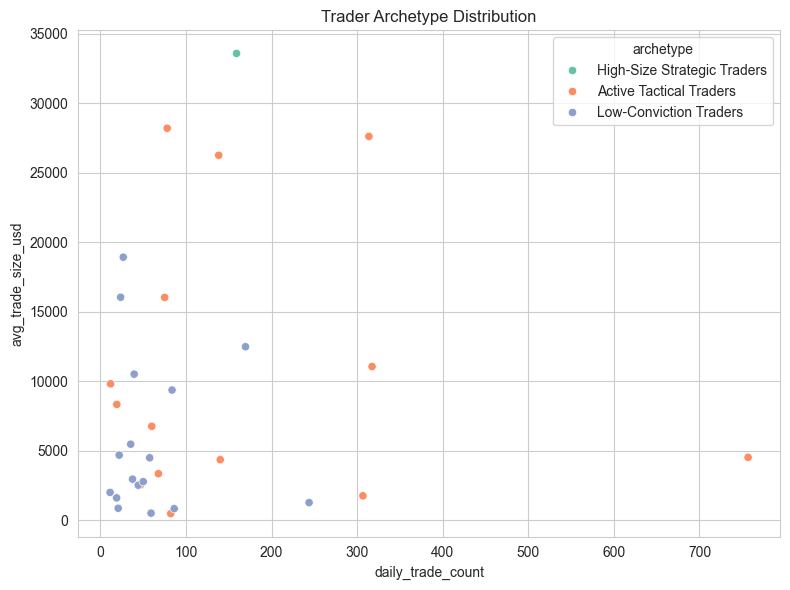

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=trader_features,
    x="daily_trade_count",
    y="avg_trade_size_usd",
    hue="archetype",
    palette="Set2"
)
plt.title("Trader Archetype Distribution")
plt.tight_layout()
plt.savefig("outputs/clustering_scatter_plot.png", dpi=300)
plt.show()



---

## Clustering Insight – Behavioral Archetypes on Hyperliquid

Using standardized behavioral metrics (trade frequency, average position size, win rate, and PnL volatility), traders were grouped into three structural archetypes via K-Means clustering.

### Archetype 1 – Active Tactical Traders
- High trade frequency  
- Moderate position size  
- Highest average win rate  
- Elevated volatility  

These traders exhibit tactical, high-turnover execution patterns.
They appear to systematically exploit short-term opportunities, particularly during volatility expansion regimes.

They benefit most during Fear periods where dispersion is elevated.

---

### Archetype 2 – Low-Conviction Traders
- Low trade frequency  
- Smaller position sizes  
- Lowest win rate  
- Moderate volatility  

This group shows limited participation and weaker edge.
They appear reactive rather than strategic.

Their performance is less regime-sensitive but structurally inferior in both high and low volatility environments.

---

### Archetype 3 – High-Size Strategic Traders
- High trade frequency  
- Very large average position size  
- Moderate win rate  
- Lower volatility relative to position size  

These traders deploy concentrated capital with controlled execution.
They appear structurally confident in directional conviction.

They perform more consistently during Greed regimes where volatility compression reduces tail risk.

---

### Structural Interpretation

The clustering confirms that trader performance is not homogeneous.

Distinct behavioral archetypes respond differently to regime shifts:

- Volatility expansion (Fear) rewards tactical and high-turnover participants.
- Stability regimes (Greed) reward disciplined capital deployment.

This reinforces the regime-conditional allocation thesis developed in Part C.


In [67]:
import os

# Ensure root-level outputs folder exists
os.makedirs("../outputs", exist_ok=True)

# Save key tables to ROOT outputs folder
daily_metrics.to_csv("../outputs/daily_metrics_full.csv", index=False)

risk_summary.reset_index().to_csv("../outputs/risk_summary.csv", index=False)

segment_performance.to_csv("../outputs/segment_performance.csv", index=False)

cluster_summary.reset_index().to_csv("../outputs/cluster_summary.csv", index=False)

# Clean feature importance export
feature_importance_df = (
    importance
    .reset_index()
    .rename(columns={"index": "feature", 0: "importance"})
)

feature_importance_df.to_csv("../outputs/feature_importance.csv", index=False)

print("Root-level tables saved successfully.")


Root-level tables saved successfully.
